In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from heartpy import filter_signal
import os

In [ ]:
for i in range(1,101):
    os.makedirs('DownSampling/{}'.format(i))

# 다운샘플링
195번째마다 데이터 가져오기

In [ ]:
def down(a,b):
    df = pd.read_csv("심전도DB/{}/{}.csv".format(a,b),header=None)

    length = int(len(df)/195) + 1
    d =[]
    
    for i in range(length): 
        d.append(df[1][i*195])
        
    d = pd.Series(d)
    d.to_csv('DownSampling/{}/{}.csv'.format(a,b), header=False)

In [ ]:
# 1차 : i - (1,87), j-(1,51) / 2차 : i - (86,101), j-(1,61)
for i in range(1,101):
    for j in range(1,61):
        down(i,j)

In [ ]:
df = pd.read_csv("심전도DB/86/51.csv",header=None)

length = int(len(df)/195)
d =[]
for i in range(length): 
    d.append(df[1][i*195])
    
d = pd.Series(d)
d.to_csv('DownSampling/86/51.csv', header=False)

In [ ]:
for i in range(86,87):
    for j in range(52,61):
        down(i,j)

## 저장한 데이터 불러오기

In [ ]:
dff = pd.read_csv("d.csv",header=None)

# bandpass

In [ ]:
for i in range(1,101):
    os.makedirs('BandPass/{}'.format(i))

In [ ]:
for a in range(1,101):
    df = pd.read_csv('DownSampling/{}/1.csv'.format(a), header=None)

    bp = filter_signal(df[1], cutoff=[0.5,40], sample_rate=500, order=5, filtertype='bandpass')
    f = pd.DataFrame(bp, columns=["1"])
    
    for b in range(2,61):
        f[b] = filter_signal(df[1], cutoff=[0.5,40], sample_rate=500, order=5, filtertype='bandpass')
            
    f.to_csv('BandPass/{}/{}_band.csv'.format(a,a), index=False)
    

In [ ]:
df = pd.read_csv("BandPass/1/1_band.csv")
df

# 최종 전체 시각화 (1번 사람 1번 파일)

원본

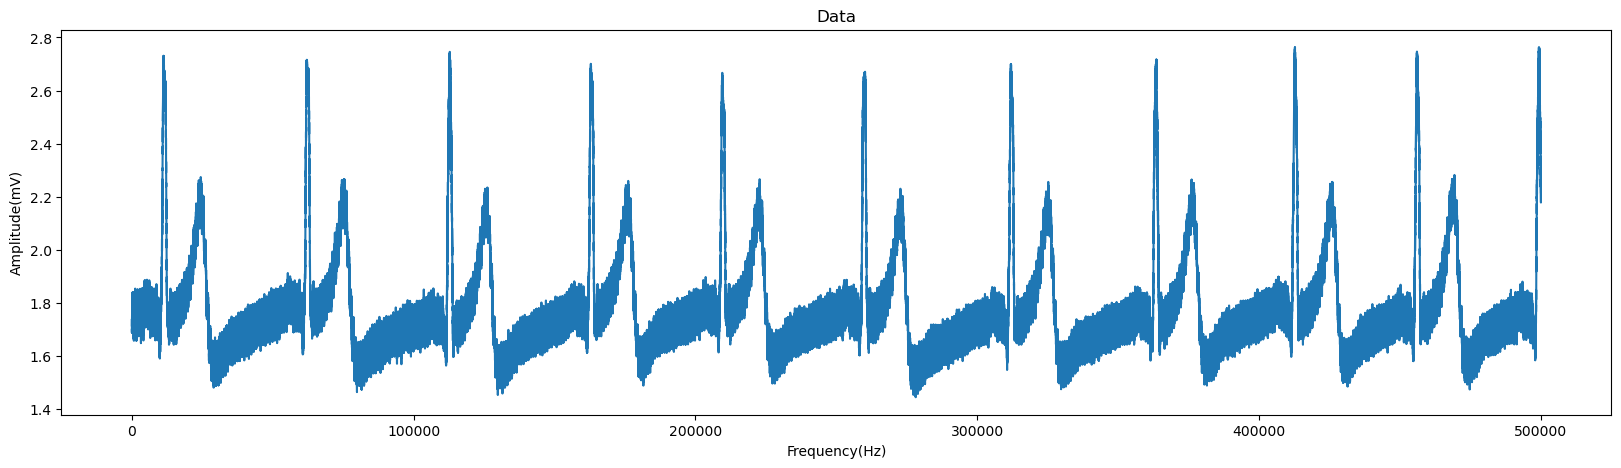

In [106]:
origin = pd.read_csv("심전도DB/1/1.csv",header=None)

plt.figure(figsize=(20,5))
origin[1].plot()

plt.title('Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

다운샘플링

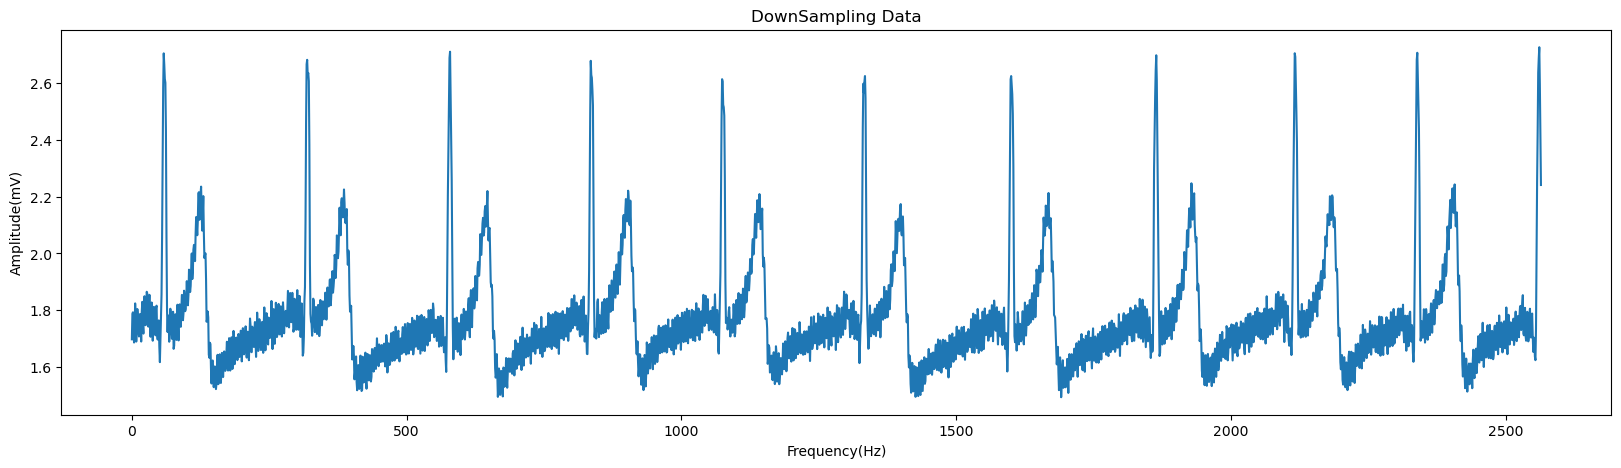

In [107]:
down = pd.read_csv("DownSampling/1/1.csv",header=None)

plt.figure(figsize=(20,5))

down[1].plot()

plt.title('DownSampling Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

bandpass

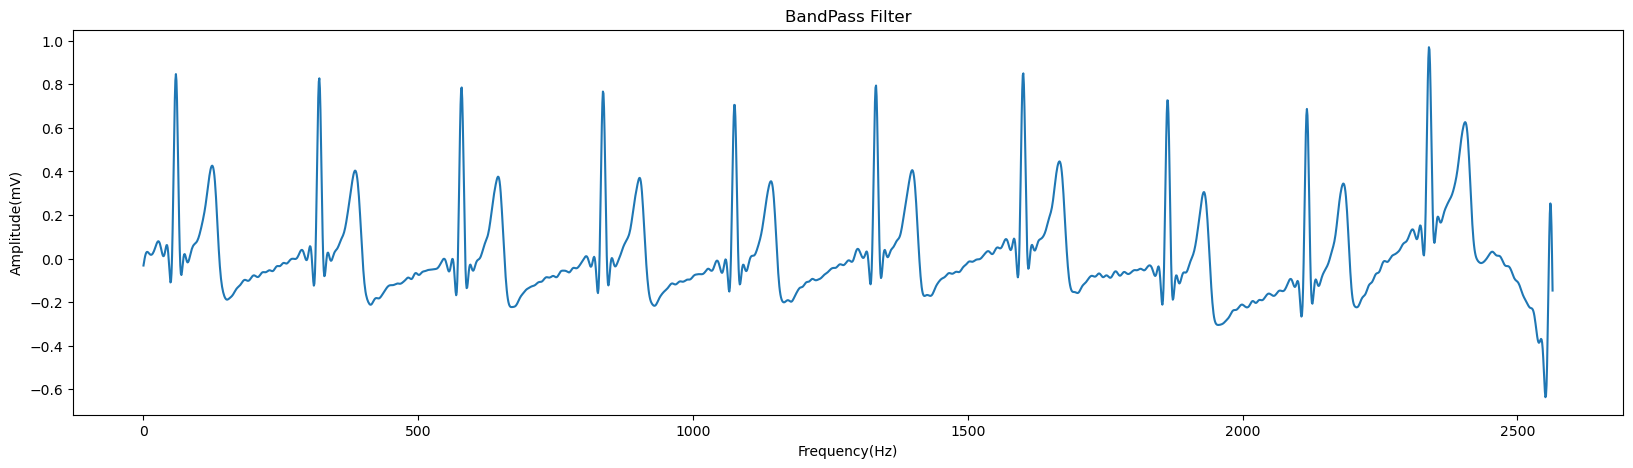

In [108]:
bandpass = pd.read_csv("BandPass/1/1_band.csv")

plt.figure(figsize=(20,5))

bandpass['1'].plot()

plt.title('BandPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

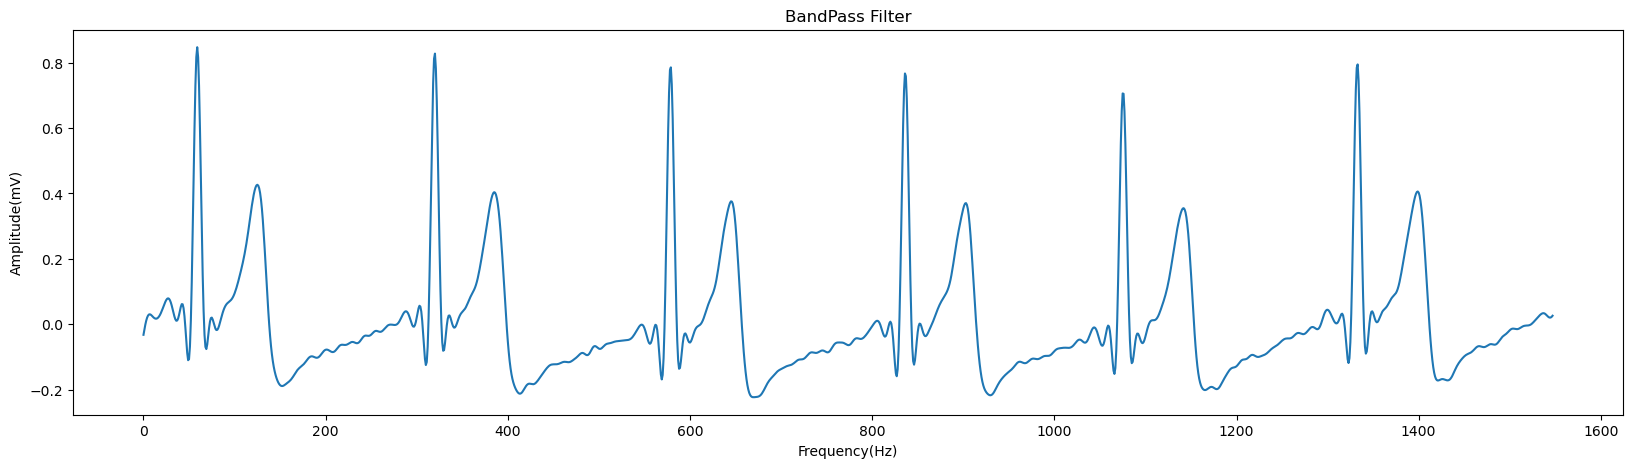

In [17]:
bandpass = pd.read_csv("BandPass/1/1_band.csv")

plt.figure(figsize=(20,5))

bandpass['1'][:1548].plot()

plt.title('BandPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.show()

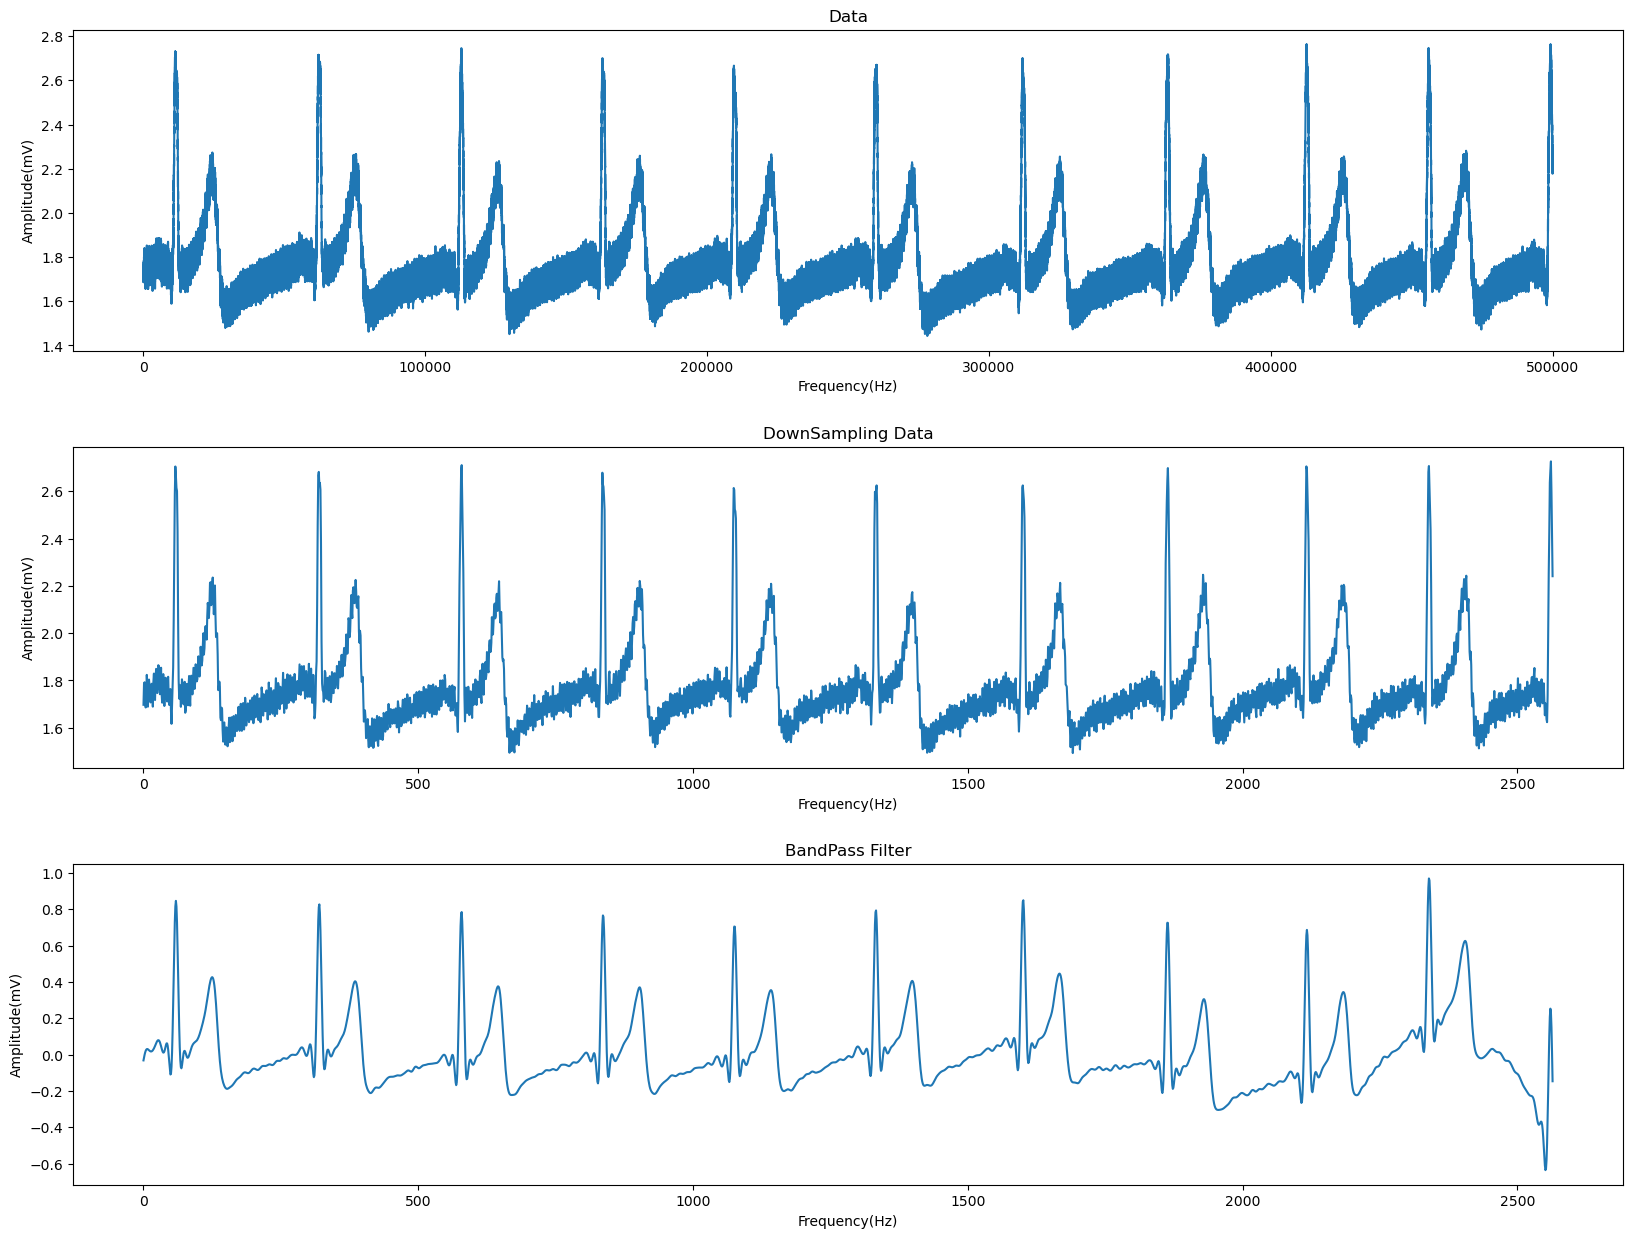

In [109]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.3)

plt.subplot(3, 1, 1)
plt.title('Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
origin[1].plot()


plt.subplot(3, 1, 2)
plt.title('DownSampling Data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
down[1].plot()

plt.subplot(3, 1, 3)
plt.title('BandPass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
bandpass['1'].plot()
plt.show()